# Case 1 - Deadline: Wed April, 24th

### Exercises - Team 1 / 2

In [1]:

# 1. Matrices for y and W:

y = [1649, 1435, 1864, 1892, 1913]

W = [13, 9, 17, 19, 20]


5-element Vector{Int64}:
 13
  9
 17
 19
 20

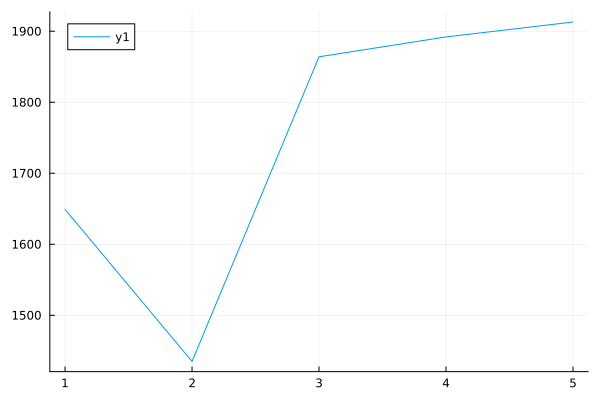

In [2]:
# 2. Plot y and W against time

time = [1, 2, 3, 4, 5]

using Plots
plot(time, y)

The plot shows a decline in the second period.

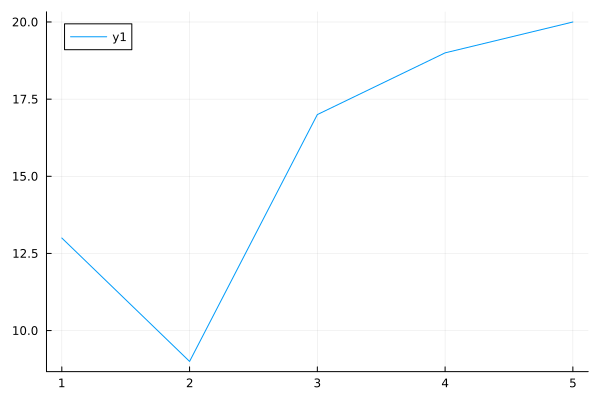

In [3]:
using Plots
plot(time, W)

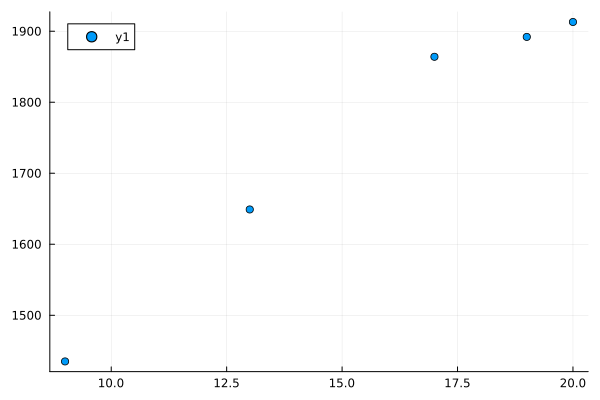

In [4]:
# 3. Make a scatter plot between y and W , interpret the potential relationship

scatter(W, y)

There seems to be a positive linear relationship meaning that an increase in temperatures seems to be positively correlated with an increase in ice cream sales.

In [5]:
# 4. Generate a column vector i with 5 ones and create the 5 * 2 matrix of regressors X = (i : W)

i = [1, 1, 1, 1, 1]     # The column vector

X = hcat(i, W) # The 5 by 2 matrix of regressor

5×2 Matrix{Int64}:
 1  13
 1   9
 1  17
 1  19
 1  20

In [6]:
# 5. Compute X'X and interpret the 4 elements of that matrix

A = X'X

2×2 Matrix{Int64}:
  5    78
 78  1300

In [7]:
# 6. Compute the determinant and the trace of X'X

using LinearAlgebra
det(A) # The det is 416

tr(A)  # The trace is 1305


1305

In [8]:
# 7. Compute (X'X)^-1 and check whether (X'X)^-1 *(X'X) = is

B = inv(A)

I = A*B

2×2 Matrix{Float64}:
 1.0          -1.11022e-16
 2.84217e-14   1.0

The fact the matrix misses the two 0 might be due to the approximations made by the software itself but their value is so small that it can be interpreted as 0.

In [9]:
# 8. Determine mathematically (X'X)'. Compute it in Julia to verify your results.

A'

2×2 adjoint(::Matrix{Int64}) with eltype Int64:
  5    78
 78  1300

This corresponds to what we have found:
$$
A' = (X'X)' =
\begin{bmatrix}
5 & 78 \\ 78 & 1300
\end{bmatrix}
$$

meaning that our results are correct.

In [10]:
# 9. Compute on the data \bar{y} using ONLY the vectors y and i

X = hcat(y, i)

A = X'X

# mean = A[2,1] / A[2, 2] # -> 8753 / 5 = 1750.6

mean = (i'y)/(i'i)

1750.6

The mean can be calculate by concatenating the two vectors together in a matrix and then multiplying that matrix with its transpose.

The resulting matrix will give us the sum of the first vector in the first row of the second column and the second row of the first (because the second vector is only made of 1) and the second row of the second column will contain the number of observations $ = (1 \times 1) \times 5$.

In [11]:
# 10. Compute TSS = (y - mean)'(y -  mean)

T = (y .- mean)

TSS = T'T

169153.2

The  total sum of squares (TSS) is 169153.2

### Exercises - Team 2/3

1. What are in words (in terms of ice creams and temperatures values) the exact meaning of the parameters $\alpha_{0}$ and $\alpha_{1}$?

The value of $\alpha_{0}$ is the average amount of one can expect to sell when the temperature is 0 while the coefficient $\alpha_{1}$ is the increase in the expected number of ice cream sales given a "one-degree" increase in temperature.

In [12]:
# Estimate the parameters by OLS using the 2 by 1 vector 

X = hcat(i, W)
beta0 = inv(X'X)X'y

2-element Vector{Float64}:
 1056.6250000000036
   44.485576923076906

The estimate for the intercept is 1056.625, according to our computation.

In [13]:

# 3. Compare with a Julia OLS routine of your choice.

using DataFrames, GLM

y = Int64.(y)
i = Int64.(i)
W = Int64.(W)

df = DataFrame(y = y, i = i, W = W)

model1 = lm(@formula(y ~ W), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + W

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  1056.62      68.4895   15.43    0.0006    838.661  1274.59
W              44.4856     4.24754  10.47    0.0019     30.968    58.0031
─────────────────────────────────────────────────────────────────────────

The OLS matrix algebra and the OLS regression give us the same value for the intercept.

In [14]:
# 4. Estimate the parameters by OLS using the scalar. Namely do not include an intercept. Compare with the correct model.

beta1 = inv(W'W)W'y

107.88307692307693

The estimated slope is now much larger than the coefficient of the regression including the intercept.

In [15]:
# 5. Compute the vector of residuals e0 and e1 with beta0 and beta1. Compute e0 and e1. Interpret.

e0 = y .- X*beta0

inv(i'i)i'e0

-3.3651303965598346e-12

In [16]:
# 5. Compute the vector of residuals e0 and e1 with beta0 and beta1. Compute e0 and e1. Interpret.

e1 = y .- W*beta1

inv(i'i)i'e1

67.62399999999995

The residuals $e_{0}$ are defined as follows:

$$
e_{0} = y_{i} - 1025.625 - 44.4858 \times W_{i}
$$

The mean of these residuals is -3.3651303965598346e-12 which is very small and close to 0 which corresponds to one of the assumption of the residuals of OLS regression.

The residuals $e_{1}$ are defined as follows:

$$
e_{1} = y_{i} - 107.88307692307693 \times W_{i}
$$

The mean of these residuals is definitely different from 0. It equals 67.62399999999995. This could tells us that given the estimated slope, the intercept is to high. Thus, by shifting the intercept, we could increase the mean of $e_{1}$.

In [17]:
# 6. Using the complete model with 'beta0', compute e0'*X

e0' * X

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 -1.68257e-11  -2.61025e-10

From the book, we find that

$$
\tag{1.9}
X' e = 0
$$

This corresponds to what can be observed from the output. The outpput is so small that we could doubt that it is different from 0.

In [18]:
# 7. With your estimated equation using matrices, forecast using Julia and OLS formula the consumption for Saturday and Sunday using the data on weather.

we = [13, 10]

forecast = beta0[1] .+ (beta0[2] * we)

2-element Vector{Float64}:
 1634.9375000000034
 1501.4807692307727

### Exercises - Team 3/4

**Exercise 1.1**

Consider observations $y_{i} = \beta + u_{i} \ \text{for} \ i = 1, \dots, n$. Compute the least-squares (LS) solution of $\beta$ and show that the objective function attains a minimum at this solution.

$$
\begin{split}
\text{SSR } &= e'e = (y - \beta)'(y - \beta)
\\
&= y'y - \beta y' - y' \beta + {\beta}' \beta
\\
&= y'y - 2y' \beta + {\beta}' \beta
\\
&= 
\end{split}
$$

**Exercise 1.3**

Show that the solution $b = (X'X)^{-1} X'y$ of minimizing the function

$$
\phi(\beta) = \sum_{i = 1}^{n} u_{i}^{2} = u'u = (y - X \beta)' (y - X \beta)
$$

is in fact a minimum.

***Hint:*** Since $A$ is any matrix. Use the result that $r(A'A) = r(A) \ \forall \ A$.